# **The Hough Transform [Part 2]**

**Recommended Reading/Viewing:**

1. [How the Hough Transform was Invented](http://www.rci.rutgers.edu/~shunsun/resource/Hough_Transform.pdf)

**Additional Reading**
1. Duda, Richard O., and Peter E. Hart. "Use of the Hough transformation to detect lines and curves in pictures." Communications of the ACM 15.1 (1972): 11-15.

**Recommended [Jupyter Theme](https://github.com/dunovank/jupyter-themes) for presenting this notebook:**
````
jt -t grade3 -cellw=90% -fs=20 -tfs=20 -ofs=20
````

---

Last time we left off with two questions:

![](../videos/hough_two.gif)

## 1. How can we use the Hough Transform to **efficiently** find **noisy** colinear points?
## 2. How might we modify the Hough Transform to avoid having intersection points at $\infty$?

![](../graphics/spacer_small.png)

- To anwers these questions, we need to visit SRI (Stanford Research Institute) in the late 1960s. 
- This was an interesting time at SRI. Researchers were building the **world's first mobile robot,** [**Shakey**](https://www.youtube.com/watch?v=GmU7SimFkpU).

![](../videos/shakey_1.gif)

- One of the many problems SRI researchers faced in developing Shakey was creating a vision system that would allow Shakey to interpet the "Blocks World" he operated in.

![](../videos/shakey_2.gif)

- SRI Researchers **Peter E. Hart** and **Richard O. Duda** were looking for an efficient and reliable method for detecting lines in images. 
- Hart + Duda likely used **Robert's Cross** or the **Sobel-Feldman Operator** to find edge pixels in images. 
- They were then trying to use these images to "build a model of the local environment and to update the position of the robot from identificaion of known landmarks."

![](../graphics/hart_and_duda-01.png)

- In search for a solution, **Peter Hart** studied the first computer vision book (!), **Azriel Rosenfeld's Picture Processing by Computer.**
- In this book, Rosenfeld briefly mentions the then obscure Hough patent, describing the tranformation algabraically for the first time, and posed a simple and computationally efficient method of implementing Hough's method. 


[Placeholder - Azriel Rosenfeld, Book, and relevant excerpt]

- However, Rosenfeld does **not solve the intersection at $\infty$ problem.**
- Simultaneously, Hart was examining another approach that he thought may be helpful in pattern recognition - **integral geometry.** This approach didn't work, but he did pick up a potentially useful alternative parameterization of a line.
- Let's have a look at this representation.

![](../graphics/integral_geometry_line_a.png)

- Instead of parameterizing our line with a slope and y-intercept, here we're parameterizing our line using $\rho$ and $\theta$.
     - $\rho$ is the distance from the origin to the closest point on our line
     - $\theta$ is the angle between the positive side of our x-axis and a the chord connecting the origin to our line at a right angle
- Now that we've established this alternative line representation, we have an important little math puzzle to solve:

# **What is the equation of our line in terms of $\rho$ and $\theta$ ?**

---

- Let's take this question one step at time. 
- First, we need a strategy. One strategy is to use our familiar parameterization of a line $y = mx +b$, and try to figure out our slope $m$ and our y-intercept $b$ in terms of our new parameters $\rho$ and $\theta$. 

![](../graphics/hough_question_three-01.png)

---

![](../graphics/hough_question_four-01.png)

---

![](../graphics/spacer_small.png)

![](../graphics/spacer_small.png)

Putting this all together, we have a new equation for a line in terms $\rho$ and $\theta$:

## $$
y = -\frac{cos(\theta)}{sin(\theta)} x + \frac{\rho}{sin(\theta)}
$$

We can re-arrange our new equation to make it a little more aesthetically pleasing:

## $$
\rho = y sin(\theta) + x cos(\theta)
$$

Let's make sure the form of our line makes sense:

![](../graphics/hough_question_five-01.png)

![](../graphics/spacer_small.png)

___

Now, here's where it gets interesting. Hough used the common $y=mx+b$ representation of the line as the core of his transform, leading to an unbounded transform space. What Peter Hart saw here was a way to use this alternate representation of a line, $\rho = y sin(\theta) + x cos(\theta)$, to tranform our data into a more useful version of Hough's original space. Let's have a look at this transform!

In [1]:
from IPython.display import Image, display
from ipywidgets import interact

def slide_show(slide_num=0):    
    '''Make a little slide show in the notebook'''
    display(Image('../graphics/hart_space/hart_space_' + str(slide_num) + '-01.png'))

In [2]:
interact(slide_show, slide_num = (0, 5));

A Jupyter Widget

- Using this alternate from of the line, our points are now transformed into pieces of sinusoids. 
- As you may know, the sum of two sinusiods of the same variable is another sinusoid of the same variable. 
    - We can show this with little trigonometry or with Euler's formula. 
- The really cool thing here is that, just as colinear points mapped to intersecting lines with Hough's tranform, **co-linear points points map to intersecting curves in Hart's version of the transform**.
- Now, remember that the real problem was that Hough's original space was unbounded - some co-linear points leds to lines that intersected at $\infty$.
- Let's see how our new space, introduced by Hart, handles this problem:

![](../videos/hough_three.gif)

- As you can see, in our $\rho \theta$ space, we see intersections for **both** horizontal and vertical lines.
- In fact, we can represent $any$ line in $x, y$ space as a point in bounded $\rho, \theta$ space!
- So we've turned our problem of finding interecting points into a problem of finding interecting **sinusoids.** and made some real progress!

![](../graphics/spacer_small.png)

## 1. How can we use the Hough Transform to **efficiently** find **noisy** colinear points?
## <s> 2. How might we modify the Hough Transform to avoid having intersection points at infinity? <s>

![](../graphics/spacer_small.png)

- Ok, one down one to go!
- Remember the whole idea here is to efficiently find noisy colinear points. This is what Hough set out to do for bubble chamber data, and what Hart and Duda needed to do to help shakey see make some sense of the world. 
- The answer to this problem comes not from Duda, Hart, or Hough, but from Azriel Rosenfeld, the author of the very first computer vision book - Picture Processing by Computer. 

[Placeholder - Azriel Rosenfeld, Book, and relevant excerpt]

In [3]:
def slide_show(slide_num=0):    
    '''Make a little slide show in the notebook'''
    display(Image('../graphics/hough_accumulator/hough_accumulator_' + str(slide_num) + '.png'))

In [4]:
interact(slide_show, slide_num = (1, 3));

A Jupyter Widget

- Rosenfeld's solution began with quantizing the $\rho$, $\theta$ space into a grid
- Each cell in the grid represents an "accumulator"
- For each point in our image space $xy$, we map that point to a curve in $\rho \theta$ space, and increment the accumulator of each cell that our cuve pases through
- Rosenfeld's solution is quite powerful. By giving up some accuracy, we're able to efficiently compute an answer, and our quantization actualy makes our line detector **less susceptable to noise!** 
- Quite often the Hough Transform is described as a "voting scheme", where each points votes for all the lines that could pass through it

From [Wikipedia Hough Transform Article](https://en.wikipedia.org/wiki/Hough_transform): 

> *"The purpose of the technique is to find imperfect instances of objects within a certain class of shapes by a voting procedure. This voting procedure is carried out in a parameter space, from which object candidates are obtained as local maxima in a so-called accumulator space that is explicitly constructed by the algorithm for computing the Hough transform."*


- Let's visualize this "voting" procedure one point at a time:

![](../videos/hough_four.gif)

- Each point in our $xy$ space is mapped to sinusiodal curve in $\theta \rho$ space. 
- For each cell of our accumulator that our curve passes through, we're incrementing our accumulator by one
- After we're done accumulating, the highest points in our accumulator space *should* correspond to the strongest lines in our image. Finding lines in our image should then just be a matter of finding the peaks in our hough space!
- Thanks to Hart and Duda, we now have a version of the Hough transform that is extremely useful for computer vision!

![](../graphics/spacer_small.png)

## <s> 1. How can we use the Hough Transform to **efficiently** find **noisy** colinear points? <s>
## <s> 2. How might we modify the Hough Transform to avoid having intersection points at infinity? <s>

![](../graphics/spacer_small.png)

# **Implementation Time**





Now that we understand the contributions of Hough, Rosenfeld, Hart, and Duda; it's time to implement their ideas in python.  Let's think through the steps we need to implement. 

1. Transform the pixel indices of the points we would like to map into $xy$ coordinates
2. Create an empty accumulator
3. Map each point to a curve in parameter space using $\rho = y_i sin(\theta) + x_i cos(\theta)$, and for each cell that our curve passes through, increment our accumulator for the cell by one

---

It would probably be nice to have like, an image to work with. Let's import a brick image and use the Sobel-Feldman operator to compute/detect some potential edge pixels

In [5]:
%pylab inline
import os, sys
sys.path.append('..')

from util.filters import filter_2d
from util.image import convert_to_grayscale

im = imread('../data/easy/brick/brick_2.jpg')
gray = convert_to_grayscale(im/255.)

Populating the interactive namespace from numpy and matplotlib


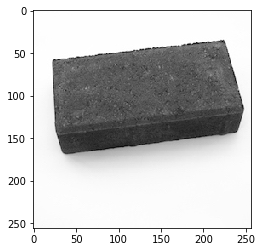

In [6]:
imshow(gray, cmap = 'gray');

In [7]:
#Implement Sobel kernels as numpy arrays
Kx = np.array([[1, 0, -1],
               [2, 0, -2],
               [1, 0, -1]])

Ky = np.array([[1, 2, 1],
               [0, 0, 0],
               [-1, -2, -1]])

In [8]:
Gx = filter_2d(gray, Kx)
Gy = filter_2d(gray, Ky)

#Compute Gradient Magnitude and Direction:
G_magnitude = np.sqrt(Gx**2+Gy**2)
G_direction = np.arctan2(Gy, Gx)

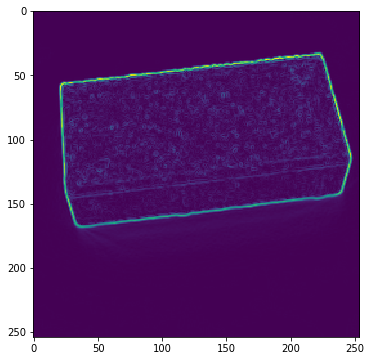

In [9]:
fig = figure(0, (6,6))
imshow(G_magnitude)

To detect thes edges, we only want to map strong edge pixels. Let's use a threshold to filter out non-edge pixels.

In [10]:
from ipywidgets import interact

#Show all pixels with values above threshold:
def tune_thresh(thresh = 0):
    fig = figure(0, (8,8))
    imshow(G_magnitude > thresh)

In [11]:
interact(tune_thresh, thresh = (0, 2.0, 0.05))

A Jupyter Widget

<function __main__.tune_thresh>

- A value of `thresh = 1.05` looks pretty good to me!
- Let's use this tresh to create and "edges" image:

In [12]:
edges = G_magnitude > 1.05

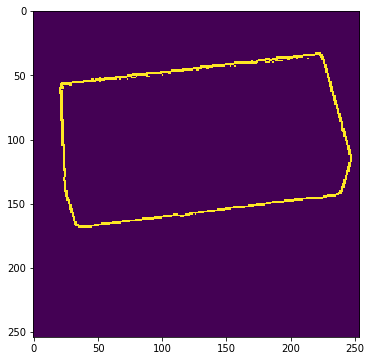

In [13]:
fig = figure(0, (6,6))
imshow(edges)

In [14]:
#How manhy points are we mapping?
sum(edges==1)

1330

### **1. Transform the pixel indices of the points we would like to map into $xy$ coordinates**

- We're now ready for our first step!
- edges is a 2-d numpy boolean array:

In [15]:
edges

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

We can find the indices of each "True" entry using the `np.where` method:

In [16]:
y_coords, x_coords = np.where(edges)

In [17]:
x_coords, y_coords

(array([219, 220, 221, ...,  43,  44,  45]),
 array([ 33,  33,  33, ..., 168, 168, 168]))

In [18]:
len(x_coords), len(y_coords)

(1330, 1330)

As a check, let's scatter plot our coordinates:

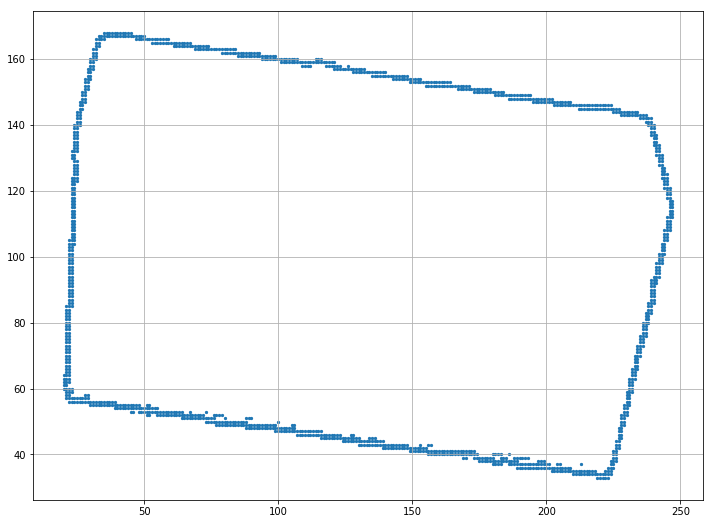

In [19]:
fig = figure(0, (12,9))
scatter(x_coords, y_coords, s = 5)
grid(1)

## Does anything look off about this plot to you?

![](../graphics/spacer_small.png)

![](../graphics/spacer_small.png)

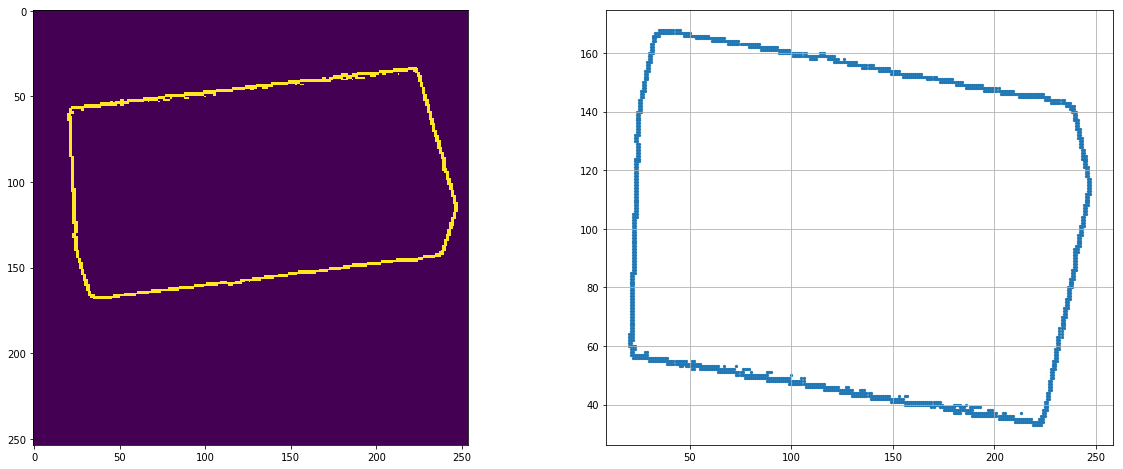

In [20]:
fig = figure(0, (20,8))
fig.add_subplot(1,2,1)
imshow(edges)

fig.add_subplot(1,2,2)
scatter(x_coords, y_coords, s = 5)
grid(1)

## Our image has been vertically flipped! **Why?**

---

- Our image has been flipped because of the way our coordinate systems are defined. Our image coorinate system's origin is the upper left corner of our image and positive is down, while our $xy$ coordinate system is defined in "the usual cartesian way". 
- Technically we don't *have* to correct this - it's really just a matter of convention. However, making this correction will make things a little more consistent/easy-to-follow. 

![](../graphics/spacer_small.png)

![](../graphics/hough_question_six.png)

![](../graphics/spacer_small.png)

----

In [21]:
y_coords_flipped = edges.shape[1] - y_coords

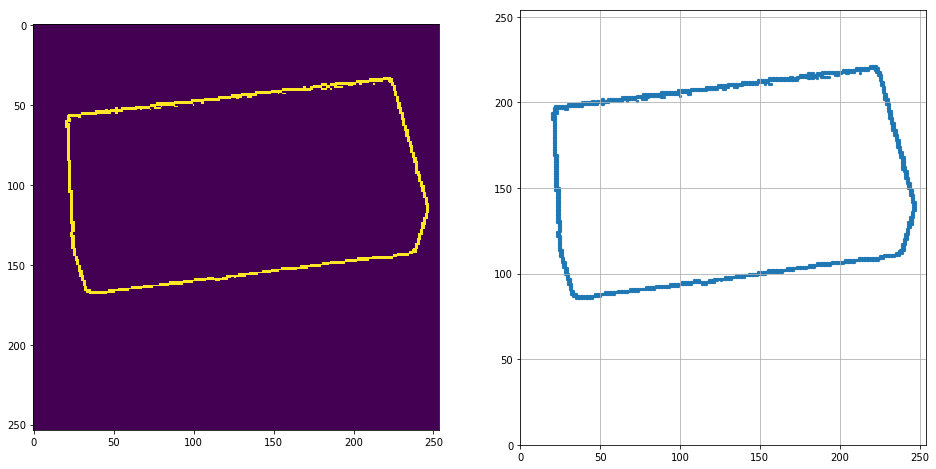

In [22]:
fig = figure(0, (16,8))
ax = fig.add_subplot(1,2,1)
imshow(edges)

ax2 = fig.add_subplot(1,2,2)
scatter(x_coords, y_coords_flipped, s = 5)
grid(1)
xlim([0, edges.shape[0]]);
ylim([0, edges.shape[0]]);

Ok, now that our coordinates make some sense, we're ready for our next step.

## **2. Create an empty accumulator**


We need to make some decision here about the size of our accumulator and the spacing of our accumulator grid cells. Let's start by picking the number of bins we want to use for $\rho$ and $\theta$.

In [23]:
#How many bins for each variable in parameter space?
phi_bins = 128
theta_bins = 128

accumulator = np.zeros((phi_bins, theta_bins))

So we have our accumulator, but there's one more important step here: **we need to figure out what $\theta$ and $\rho$ values each cell in our accumulator actually correspond to.** This depends on the range of phi and theta values we would like to cover. Fortunately, as we saw earlier, this set is bounded. However, it may not be immediately obvious what these bounds are. **Let's explore this.**

---

![](../graphics/hough_question_eight-01.png)

---

![](../graphics/spacer_small.png)

In [33]:
phi_min = -edges.shape[0]
phi_max = edges.shape[1]

theta_min = 0
theta_max = np.pi

#Compute the phi and theta values for the grids in our accumulator:
phis = np.linspace(phi_min, phi_max, accumulator.shape[0])
thetas = np.linspace(theta_min, theta_max, accumulator.shape[1])

In [34]:
phis

array([-254., -250., -246., -242., -238., -234., -230., -226., -222.,
       -218., -214., -210., -206., -202., -198., -194., -190., -186.,
       -182., -178., -174., -170., -166., -162., -158., -154., -150.,
       -146., -142., -138., -134., -130., -126., -122., -118., -114.,
       -110., -106., -102.,  -98.,  -94.,  -90.,  -86.,  -82.,  -78.,
        -74.,  -70.,  -66.,  -62.,  -58.,  -54.,  -50.,  -46.,  -42.,
        -38.,  -34.,  -30.,  -26.,  -22.,  -18.,  -14.,  -10.,   -6.,
         -2.,    2.,    6.,   10.,   14.,   18.,   22.,   26.,   30.,
         34.,   38.,   42.,   46.,   50.,   54.,   58.,   62.,   66.,
         70.,   74.,   78.,   82.,   86.,   90.,   94.,   98.,  102.,
        106.,  110.,  114.,  118.,  122.,  126.,  130.,  134.,  138.,
        142.,  146.,  150.,  154.,  158.,  162.,  166.,  170.,  174.,
        178.,  182.,  186.,  190.,  194.,  198.,  202.,  206.,  210.,
        214.,  218.,  222.,  226.,  230.,  234.,  238.,  242.,  246.,
        250.,  254.]

In [35]:
thetas

array([0.        , 0.02473695, 0.0494739 , 0.07421085, 0.0989478 ,
       0.12368475, 0.1484217 , 0.17315865, 0.1978956 , 0.22263255,
       0.2473695 , 0.27210645, 0.2968434 , 0.32158035, 0.3463173 ,
       0.37105425, 0.3957912 , 0.42052815, 0.4452651 , 0.47000205,
       0.494739  , 0.51947595, 0.5442129 , 0.56894985, 0.5936868 ,
       0.61842375, 0.6431607 , 0.66789765, 0.6926346 , 0.71737155,
       0.7421085 , 0.76684545, 0.7915824 , 0.81631935, 0.8410563 ,
       0.86579325, 0.8905302 , 0.91526715, 0.9400041 , 0.96474105,
       0.989478  , 1.01421495, 1.0389519 , 1.06368885, 1.0884258 ,
       1.11316275, 1.1378997 , 1.16263665, 1.1873736 , 1.21211055,
       1.2368475 , 1.26158445, 1.2863214 , 1.31105835, 1.3357953 ,
       1.36053225, 1.3852692 , 1.41000615, 1.4347431 , 1.45948005,
       1.484217  , 1.50895395, 1.5336909 , 1.55842785, 1.5831648 ,
       1.60790175, 1.6326387 , 1.65737565, 1.6821126 , 1.70684955,
       1.7315865 , 1.75632345, 1.7810604 , 1.80579735, 1.83053

Alright, so we now have an empty accumulator, plus the $\rho \theta$ coordinates of each accumulator cell!

![](../graphics/spacer_small.png)

## **3. Map each point to a curve in parameter space using $\rho = y_i sin(\theta) + x_i cos(\theta)$, and for each cell that our curve passes through, increment our accumulator for the cell by one**


So, we have these `x_coords` and `y_coords_flipped` that we need to map into **parameter space**.

In [39]:
len(x_coords)

1330

In [36]:
x_coords

array([219, 220, 221, ...,  43,  44,  45])

In [37]:
y_coords_flipped

array([221, 221, 221, ...,  86,  86,  86])

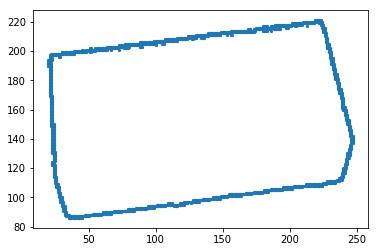

In [38]:
scatter(x_coords, y_coords_flipped, s = 5)

- We'll interate through our points one at a time, and map them into paremeter space using our equation $\rho = y_i sin(\theta) + x_i cos(\theta)$.


In [44]:
for i in range(len(x_coords)):
    #Grab a single point
    x = x_coords[i]
    y = y_coords_flipped[i]

    #Actually do transform!
    curve_phis = x*np.cos(thetas)+y*np.sin(thetas)

    for j in range(len(thetas)):
        #Make sure that the part of the curve falls within our accumulator
        if np.min(abs(curve_phis[j]-phis)) <= 1.0:
            #Find the cell our curve goes through:
            phi_index = argmin(abs(curve_phis[j]-phis))
            accumulator[phi_index, j] += 1

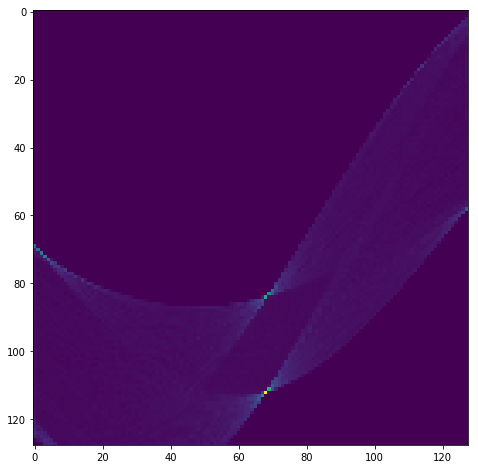

In [50]:
fig = figure(0, (8,8))
imshow(accumulator);

Alright, we can make our some curves and some spikes in our parameter space!

Ok, this is what I want to get us to here, perhaps my code snippets can build to this??

In [ ]:
class HoughAccumulator(object):
    def __init__(self, theta_bins, phi_bins, phi_min, phi_max):
        '''
        Simple class to implement an accumalator for the hough transform. 
        Args: 
        theta_bins = number of bins to use for theta
        phi_bins = number of bins to use for phi
        phi_max = maximum phi value to accumulate
        phi_min = minimu phi value to acumulate
        '''
        self.accumulator = np.zeros((phi_bins, theta_bins))

        #This covers all possible lines:
        theta_min = 0
        theta_max = np.pi

        #Compute the phi and theta values for the grids in our accumulator:
        self.phis = np.linspace(phi_min, phi_max, self.accumulator.shape[0])
        self.thetas = np.linspace(theta_min, theta_max, self.accumulator.shape[1])

    def accumulate(self, x_coords, y_coords):
        '''
        Iterate through x and y coordinates, accumulate in hough space, and return. 
        Args: 
        x_coords = x-coordinates of points to transform
        y_coords = y-coordinats of poits to transform

        Returns:
        accumulator = numpy array of accumulated values. 
        '''

        for i in range(len(x_coords)):
            #Grab a single point
            x = x_coords_scaled[i]
            y = y_coords_scaled[i]

            #Actually do transform!
            curve_phis = x*np.cos(self.thetas)+y*np.sin(self.thetas)

            for j in range(len(self.thetas)):
                #Make sure that the part of the curve falls within our accumulator
                if np.min(abs(curve_phis[j]-self.phis)) <= 1.0:
                    #Find the cell our curve goes through:
                    phi_index = argmin(abs(curve_phis[j]-self.phis))
                    accumulator[phi_index, j]+=1

        return accumulator
    
    def clear_accumulator(self):
        '''
        Zero out accumulator
        '''
        self.accumulator = np.zeros((phi_bins, theta_bins))